<a href="https://colab.research.google.com/github/bjh5098/Analysis-MLB-team-transfer-14-18-/blob/master/TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import pandas as pd
import csv
import statistics
import numpy as np
import matplotlib.pyplot as plt
import pylab


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
move = pd.read_csv("/content/drive/My Drive/Colab Notebooks/My project/move.csv")

In [0]:
move

In [0]:
movearr = []
with open("/content/drive/My Drive/Colab Notebooks/My project/move.csv") as csvfile:
  reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
  for row in reader:
    movearr.append(row)

In [0]:
MLBdict = {'ATL':0,'MIA':1,'NYN':2,'PHI':3,'WAS':4,'CHN':5,'CIN':6,'MIL':7,'PIT':8,'SLN':9,
           'ARI':10,'COL':11,'LAN':12,'SDN':13,'SFN':14,'BAL':15,'BOS':16,'NYA':17,'TBA':18,'TOR':19,
           'CHA':20,'CLE':21,'DET':22,'KCA':23,'MIN':24,'HOU':25,'LAA':26,'OAK':27,'SEA':28,'TEX':29}
MLBdictr = {0:'ATL',1:'MIA',2:'NYN',3:'PHI',4:'WAS',5:'CHN',6:'CIN',7:'MIL',8:'PIT',9:'SLN',
           10:'ARI',11:'COL',12:'LAN',13:'SDN',14:'SFN',15:'BAL',16:'BOS',17:'NYA',18:'TBA',19:'TOR',
           20:'CHA',21:'CLE',22:'DET',23:'KCA',24:'MIN',25:'HOU',26:'LAA',27:'OAK',28:'SEA',29:'TEX'}

In [0]:
network = [[0]*30 for i in range(30)]
networkbw = [[0]*30 for i in range(30)]
incomeMLB = [0]*30
outcomeMLB = [0]*30
count = 0
for i in range(1,2444):
  for j in range(2,9):
    if movearr[i][j] == "":
      break
    elif movearr[i][j-1] != movearr[i][j]:##이전팀에서 다음팀으로 옮길시 +1
      #방향성 살려서
      network[MLBdict[movearr[i][j-1]]][MLBdict[movearr[i][j]]]+=1
      #방향성 없이
      networkbw[MLBdict[movearr[i][j]]][MLBdict[movearr[i][j-1]]]+=1
      networkbw[MLBdict[movearr[i][j-1]]][MLBdict[movearr[i][j]]]+=1
      #각팀당 출입
      incomeMLB[MLBdict[movearr[i][j]]] +=1
      outcomeMLB[MLBdict[movearr[i][j-1]]] +=1
      count = count+1
    else:
      continue




In [0]:
incomeMLB

In [0]:
outcomeMLB

In [0]:
inout = [0]*30
for i in range (0,30):
  inout[i]=incomeMLB[i]-outcomeMLB[i]
inout


In [0]:
networkbw

In [0]:
networklist = [0]*(30*29)
k = 0
for i in range (0,30):
  for j in range (0,30):
    if i == j :
      continue
    else:
      networklist[k]=network[i][j]
      k = k + 1

networklist

In [0]:
networklistbw = [0]*(15*29)
k = 0
for i in range (0,30):
  for j in range (i,30):
    if i == j :
      continue
    else:
      networklistbw[k]=networkbw[i][j]
      k = k + 1

networklistbw

In [0]:
med = [0]*30
mean_n = [0]*30
statistics.median(network[0])
for i in range(0,30):
  med[i] = statistics.median(network[i])
  mean_n[i] = statistics.mean(network[i])
med
mean_n

In [0]:
np.percentile(networklist, 80)

4.0

In [0]:
df = pd.DataFrame(network, columns=MLBdict, index=MLBdict, dtype=int )
df
#df.graph

In [0]:
dfbw = pd.DataFrame(networkbw, columns=MLBdict, index=MLBdict, dtype=int )
dfbw

In [0]:
##nx.draw(network, with_labels=True, node_size = 800, node_color='black', font_color='white', font_size=20)
movemean = count / (30*29)
movemean

2.2091954022988505

In [0]:
movemeanbw = count / ((30*29)/2)
movemeanbw

4.418390804597701

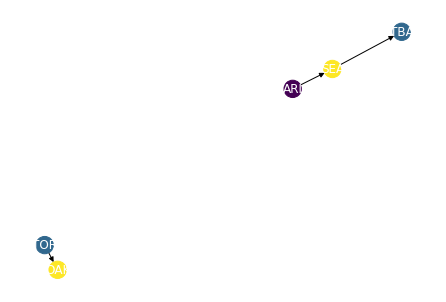

In [0]:
dg = nx.DiGraph()

for i in range(30):
  for j in range(30):
    if i == j :
      continue
    else :
      if network[i][j] > np.percentile(networklist,99.5) :
        dg.add_weighted_edges_from([(MLBdictr[i],MLBdictr[j],network[i][j])])
      #(i,j,network[i][j])
      #dg.add_weighted_edges_from([(i,j,network[i][j])])
val_map = {'ATL':0,'MIA':0,'NYN':0,'PHI':0,'WAS':0,'CHN':1,'CIN':1,'MIL':1,'PIT':1,'SLN':1,
           'ARI':2,'COL':2,'LAN':2,'SDN':2,'SFN':2,'BAL':3,'BOS':3,'NYA':3,'TBA':3,'TOR':3,
           'CHA':4,'CLE':4,'DET':4,'KCA':4,'MIN':4,'HOU':5,'LAA':5,'OAK':5,'SEA':5,'TEX':5}
values = [val_map.get(node, 1.0) for node in dg.nodes()]
nx.draw(dg, node_color = values, with_labels=True, font_color='white')

In [0]:
NLE = nx.Graph()
for i in range(0,5):
  for j in range(0,5):
    if i == j :
      continue
    else :
      if networkbw[i][j] > movemeanbw :
        NLE.add_weighted_edges_from([(MLBdictr[i],MLBdictr[j],networkbw[i][j])])
      #(i,j,network[i][j])
      #dg.add_weighted_edges_from([(i,j,network[i][j])])
val_map = {'ATL':0,'MIA':0,'NYN':0,'PHI':0,'WAS':0,'CHN':1,'CIN':1,'MIL':1,'PIT':1,'SLN':1,
           'ARI':2,'COL':2,'LAN':2,'SDN':2,'SFN':2,'BAL':3,'BOS':3,'NYA':3,'TBA':3,'TOR':3,
           'CHA':4,'CLE':4,'DET':4,'KCA':4,'MIN':4,'HOU':5,'LAA':5,'OAK':5,'SEA':5,'TEX':5}
values = [val_map.get(node, 1.0) for node in dg.nodes()]
nx.draw(dg, node_color = values, with_labels=True, font_color='white')

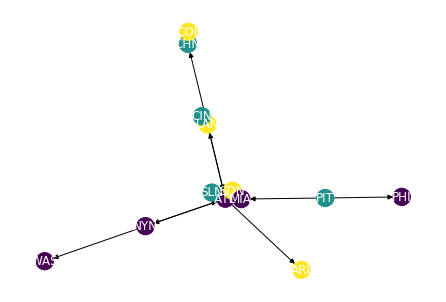

In [0]:
NL = nx.DiGraph()
count=0
for i in range(0,15):
  for j in range(0,15):
    if i == j :
      continue
    else :
      if network[i][j] > np.percentile(networklist,80) :
        NL.add_weighted_edges_from([(MLBdictr[i],MLBdictr[j],network[i][j])])
        count = count + 1
      
      #(i,j,network[i][j])
      #dg.add_weighted_edges_from([(i,j,network[i][j])])
val_map = {'ATL':0,'MIA':0,'NYN':0,'PHI':0,'WAS':0,'CHN':1,'CIN':1,'MIL':1,'PIT':1,'SLN':1,
           'ARI':2,'COL':2,'LAN':2,'SDN':2,'SFN':2,'BAL':3,'BOS':3,'NYA':3,'TBA':3,'TOR':3,
           'CHA':4,'CLE':4,'DET':4,'KCA':4,'MIN':4,'HOU':5,'LAA':5,'OAK':5,'SEA':5,'TEX':5}
values = [val_map.get(node, 1.0) for node in NL.nodes()]
nx.draw(NL, node_color = values, with_labels=True, font_color='white')

In [0]:
count

15

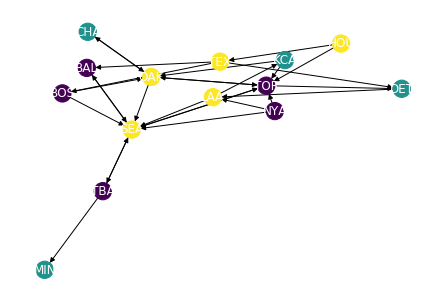

In [0]:
AL = nx.DiGraph()
count=0
for i in range(15,30):
  for j in range(15,30):
    if i == j :
      continue
    else :
      if network[i][j] > np.percentile(networklist,80) :
        AL.add_weighted_edges_from([(MLBdictr[i],MLBdictr[j],network[i][j])])
        count = count + 1
      #(i,j,network[i][j])
      #dg.add_weighted_edges_from([(i,j,network[i][j])])
val_map = {'ATL':0,'MIA':0,'NYN':0,'PHI':0,'WAS':0,'CHN':1,'CIN':1,'MIL':1,'PIT':1,'SLN':1,
           'ARI':2,'COL':2,'LAN':2,'SDN':2,'SFN':2,'BAL':3,'BOS':3,'NYA':3,'TBA':3,'TOR':3,
           'CHA':4,'CLE':4,'DET':4,'KCA':4,'MIN':4,'HOU':5,'LAA':5,'OAK':5,'SEA':5,'TEX':5}
values = [val_map.get(node, 1.0) for node in AL.nodes()]
nx.draw(AL, node_color = values, with_labels=True, font_color='white')

In [0]:
count

28

각각 연결중심성 계산하기

In [0]:
incomeMLB

[96,
 68,
 48,
 56,
 54,
 74,
 52,
 72,
 62,
 41,
 60,
 34,
 74,
 73,
 49,
 58,
 56,
 67,
 78,
 89,
 60,
 59,
 52,
 56,
 53,
 42,
 92,
 81,
 99,
 67]

In [0]:
outcomeMLB

[87,
 59,
 55,
 54,
 50,
 68,
 48,
 65,
 71,
 53,
 64,
 53,
 64,
 78,
 41,
 59,
 63,
 82,
 75,
 80,
 56,
 49,
 53,
 69,
 60,
 53,
 80,
 73,
 83,
 77]

In [0]:
inout

[9,
 9,
 -7,
 2,
 4,
 6,
 4,
 7,
 -9,
 -12,
 -4,
 -19,
 10,
 -5,
 8,
 -1,
 -7,
 -15,
 3,
 9,
 4,
 10,
 -1,
 -13,
 -7,
 -11,
 12,
 8,
 16,
 -10]